In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
e = 0.8 # Coefficient of Restitution
m_foot = 10 # Mass of foot
m_ball = 0.4 # Mass of ball

def get_ball_vel(vel_foot_in, vel_ball_in, m_foot, m_ball, e):
  """
  Input: vel_foot_in, Intital Foot Velocity (Numpy Array, 1x2)
         vel_ball_in, Initial Ball Velocity (Numpy Array, 1x2)
         m_foot, Mass of Foot
         m_ball, Mass of Ball
         e, Coefficient of Restitution
  Returns: vel_ball_fin, Final Ball Velocity (Numpy Array, 1x2)
  """

  vel_ball_fin = (((vel_foot_in * m_foot * (1 + e)) +
                   (vel_ball_in * (m_ball - e * m_foot)))/ (m_foot + m_ball))
  
  return vel_ball_fin

def get_proj_data(pos_in, vel_in, t_range, g=9.81):
  """
  Input: vel_in, Initial Velocity (Numpy Array, 1x2)
         t_range, Time Range (Numpy Array, 1xn)
  Returns: x_data, Projectile x data in t_range (Numpy Array, 2xn)
           y_data, Projectile y data in t_range (Numpy Array, 2xn)
  """

  pos_x, pos_y = pos_in[0], pos_in[1]
  theta = np.arctan(vel_in[1]/vel_in[0])
  # x_data = np.zeros_like(t_range)
  # y_data = np.zeros_like(t_range)
  x_data, y_data = [], []

  for idx, t_step in enumerate(t_range):
    if pos_y + vel_in[1] * t_step - 0.5 * g * t_step**2 < 0 : break
    # x_data[idx] = pos_x + vel_in[0] * t_step
    # y_data[idx] = pos_y + vel_in[1] * t_step - 0.5 * g * t_step**2
    x_data.append(pos_x + vel_in[0] * t_step)
    y_data.append(pos_y + vel_in[1] * t_step - 0.5 * g * t_step**2)
  
  return np.array(x_data), np.array(y_data)

[86.53846154 17.30769231]


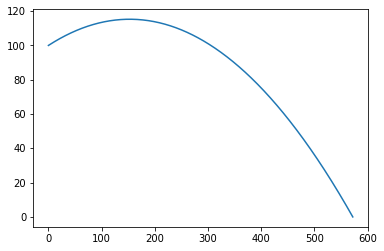

In [ ]:
vb_in = np.array([0, 0])
vf_in = np.array([50, 10])

vb_fin = get_ball_vel(vf_in, vb_in, m_foot, m_ball, e)
pos_b = [0, 100]
print(vb_fin)
t_range = np.linspace(0, 100, 10000)

proj_x, proj_y = get_proj_data(pos_b, vb_fin, t_range)
plt.plot(proj_x, proj_y)